In [41]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [42]:
n = 21

clientes = [i for i in range(n)]
arcos = [(i,j) for i in range(n) for j in range(n) if i!=j]

q = {n:np.random.randint(10,15) for n in clientes}

q[0] = 0

In [43]:
np.random.seed(0)

x = np.random.rand(n)*100 #agragar dos listas [] [] para los costos de la matriz de lkh
y = np.random.rand(n)*100

In [46]:
distancia = {(i,j): np.hypot(x[i] - x[j], y[i] - y[j]) for i,j in arcos}

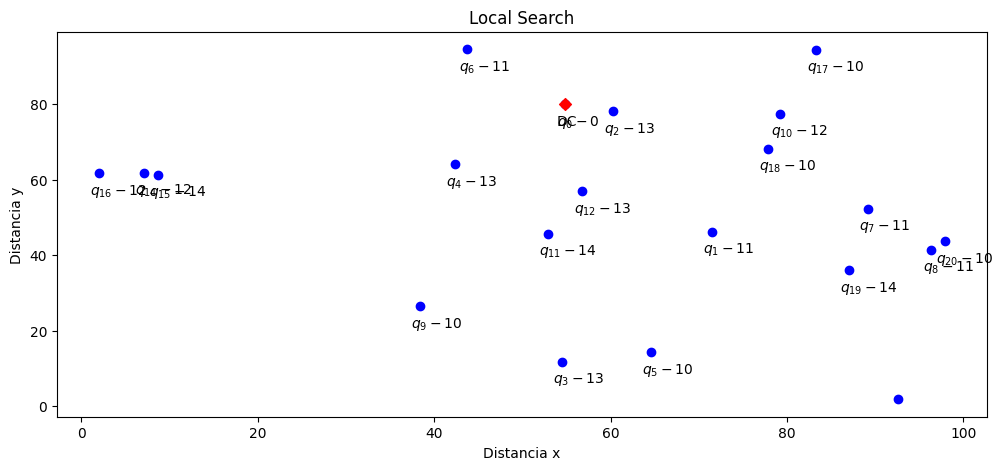

In [48]:
#Grafico
plt.figure(figsize = (12,5))
plt.scatter(x,y, color = 'blue')

#DC
plt.scatter(x[0], y[0], color = 'red', marker = 'D')
plt.annotate("DC", (x[0]-1, y[0]-5.5))

#Clientes y demanda
for i in clientes:
    plt.annotate('$q_{%d} - %d$'%(i,q[i]), (x[i]-1, y[i]-5.5))

plt.xlabel("Distancia x")
plt.ylabel("Distancia y")
plt.title("Local Search")

plt.show()

In [55]:
#Funcion de Nearest_Neaighbor
def Nearest_Neaighbor(starting_node, clientes, distancia):
    NN=[starting_node]
    n = len(clientes)

    while len(NN) < n:
        k = NN[-1]
        nn = {(k,j): distancia[(k,j)] for j in clientes if j != k and j not in NN}
        nn.items()
        new = min(nn.items(), key = lambda x: x [1])
        NN.append(new[0][1])

  # NN.append(starting_node) #se elimina para no volver al nodo de inicio OVRP

    return NN

In [56]:
#Funcion para saber la distancia total de costos
def total_distancia(lista, distancia):

    dist = 0
    for n in range(len(lista)-1):
        i=lista[n]
        j=lista[n+1]
        dist=dist+distancia[(i,j)]

    return dist

In [57]:
#Creacion de la solucion inicial con NN
starting_node=0
NN = Nearest_Neaighbor(starting_node, clientes, distancia)
NN

[0, 2, 10, 18, 7, 20, 8, 19, 1, 12, 11, 4, 6, 17, 9, 3, 5, 13, 15, 14, 16]

In [58]:
d = total_distancia(NN, distancia)
d

472.82261337653324

In [59]:
#Coordenadas
x[NN[2]]

79.17250380826646

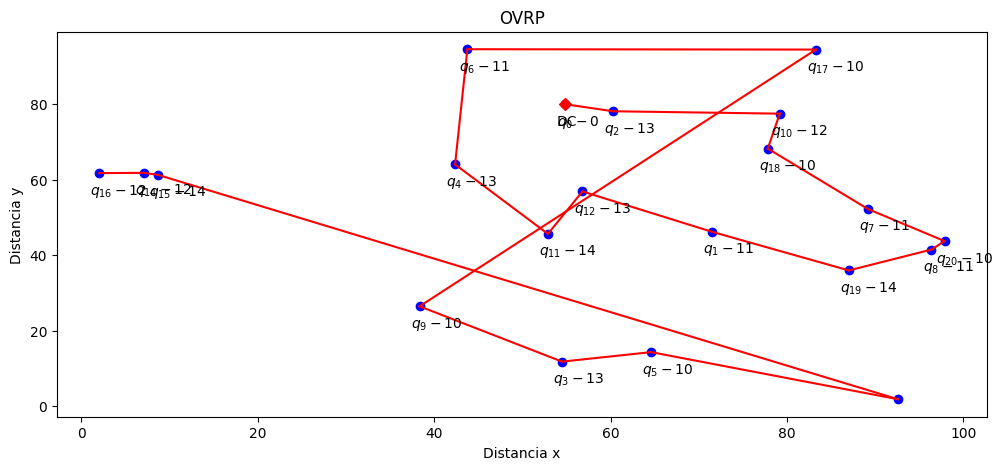

In [60]:
#Grafico de NN
plt.figure(figsize = (12,5))
plt.scatter(x,y, color = 'blue')

#DC
plt.scatter(x[0], y[0], color = 'red', marker = 'D')
plt.annotate("DC", (x[0]-1, y[0]-5.5))

#Viajes
for n in range(len(NN)-1):
    plt.plot([x[NN[n]],x[NN[n+1]]], [y[NN[n]],y[NN[n+1]]], color = 'red')

#Clientes y demanda
for i in clientes:
    plt.annotate('$q_{%d} - %d$'%(i,q[i]), (x[i]-1, y[i]-5.5))

plt.xlabel("Distancia x")
plt.ylabel("Distancia y")
plt.title("OVRP")

plt.show()

In [61]:
#Implementacion de Local Seach
def Local_Search(NN,distancia):

    min_cambio = 0

    for i in range(len(NN)-2):
        for j in range(i+2, len(NN)-1):
            
            costo_actual = distancia[(NN[i], NN[i+1])] + distancia[(NN[j], NN[j+1])]
            costo_nuevo = distancia[(NN[i], NN[j])] + distancia[(NN[i+1], NN[j+1])]
            
            cambio = costo_nuevo - costo_actual

            if cambio < min_cambio:
                min_cambio = cambio
                min_i = i
                min_j = j

    if min_cambio < 0:
         NN[min_i +1:min_j+1]=NN[min_i+1:min_j+1][::-1]

    return NN
            

In [62]:
#Ejecucion del Algoritmo
time_i = time.time()
solucion = NN.copy()

intercambio = 1
contador = 0

while intercambio != 0 :

    contador = contador + 1
    primera = total_distancia(solucion, distancia)
    solucion = Local_Search(solucion, distancia).copy()
    ultima = total_distancia(solucion, distancia)

    intercambio = np.abs(ultima - primera)

time_f = time.time()

print("Solucion", solucion)
print("Distancia Total", total_distancia(solucion, distancia))
print("Tiempo", time_f - time_i)
print("Total de Intentos", contador)
    

Solucion [0, 2, 18, 10, 17, 6, 4, 12, 11, 1, 7, 20, 8, 19, 13, 5, 3, 9, 15, 14, 16]
Distancia Total 363.41192098758177
Tiempo 0.0003330707550048828
Total de Intentos 6


In [63]:
NN

[0, 2, 10, 18, 7, 20, 8, 19, 1, 12, 11, 4, 6, 17, 9, 3, 5, 13, 15, 14, 16]

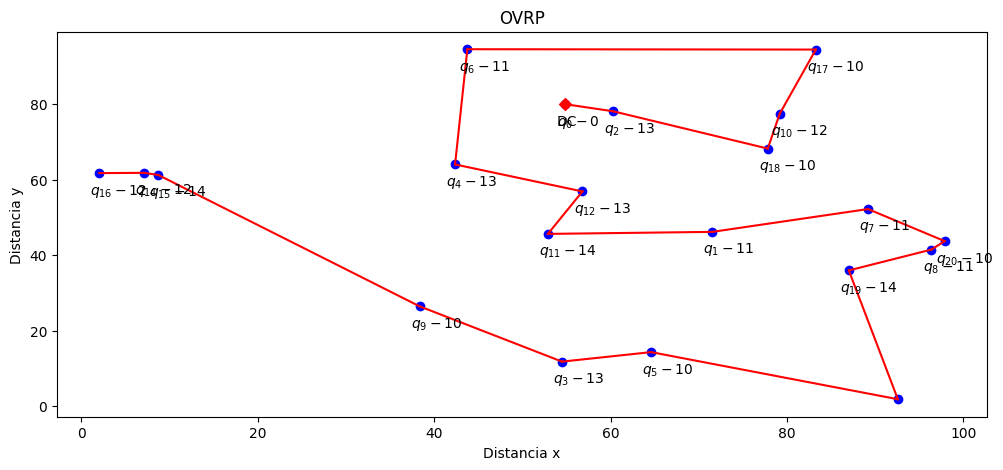

In [64]:
#Grafico de Local Serach
plt.figure(figsize = (12,5))
plt.scatter(x,y, color = 'blue')

#DC
plt.scatter(x[0], y[0], color = 'red', marker = 'D')
plt.annotate("DC", (x[0]-1, y[0]-5.5))

#Viajes
for n in range(len(solucion)-1):
    plt.plot([x[solucion[n]],x[solucion[n+1]]], [y[solucion[n]],y[solucion[n+1]]], color = 'red')

#Clientes y demanda
for i in clientes:
    plt.annotate('$q_{%d} - %d$'%(i,q[i]), (x[i]-1, y[i]-5.5))

plt.xlabel("Distancia x")
plt.ylabel("Distancia y")
plt.title("OVRP")

plt.show()